In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
df = pd.read_csv("D:\PROJECT\StreamlitApp\data\loan_data.csv")

In [154]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [155]:
df.iloc[:, 1:].isna().sum()

Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [156]:
pd.DataFrame(df.iloc[:, 1:].isna().sum())

,0
Gender,5
Married,0
Dependents,8
Education,0
Self_Employed,21
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,11
Credit_History,30


In [157]:
pd.DataFrame(df.iloc[:, 1:].isna().sum()).T

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,5,0,8,0,21,0,0,0,11,30,0,0


In [158]:
missing_df = pd.DataFrame(df.iloc[:, 1:].isna().sum()).T

<Axes: >

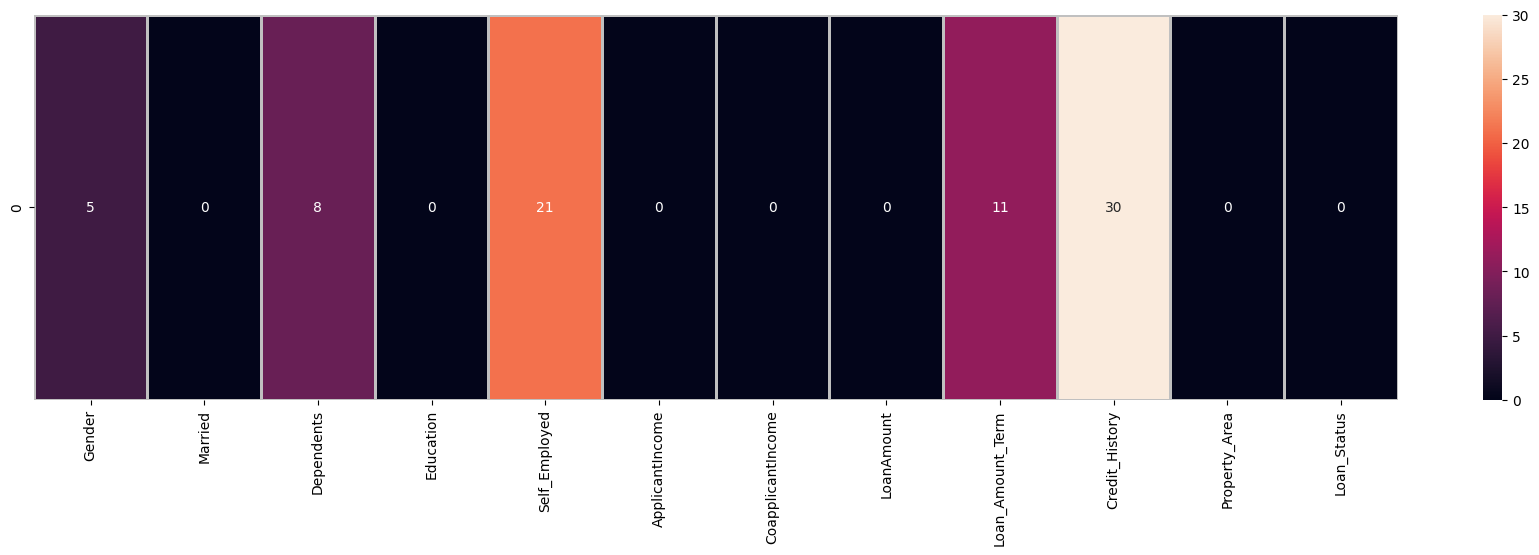

In [159]:
fig, ax = plt.subplots(figsize=(22,5))
sns.heatmap(missing_df, annot= True, linecolor = 'silver', linewidth=1, ax=ax)

<Axes: >

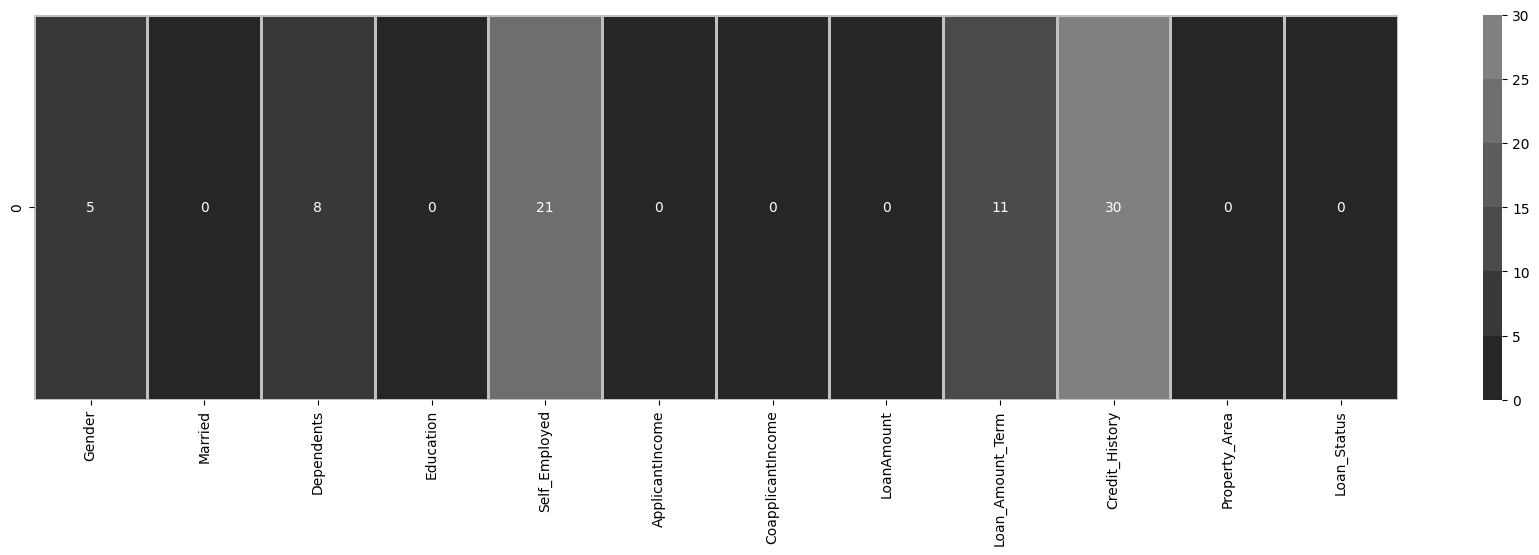

In [160]:
fig, ax = plt.subplots(figsize=(22,5))
sns.heatmap(missing_df, annot= True,cmap=sns.dark_palette('gray'),  linecolor = 'silver', linewidth=1, ax=ax)

In [161]:
def get_missing_value_graph(df):
    missing_df = pd.DataFrame(df.iloc[:, 1:].isna().sum()).T
    fig, ax = plt.subplots(figsize=(22,5))
    sns.heatmap(missing_df, annot= True,cmap=sns.dark_palette('gray'),  linecolor = 'silver', linewidth=1, ax=ax)
    return fig

In [162]:
df =df.drop(columns=['Loan_ID'])

In [163]:
cat_columns = [col for col in df.columns if df[col].dtype ==object]

In [164]:
cat_columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [165]:
df.select_dtypes(include='object').columns.tolist()

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

<Axes: xlabel='Married', ylabel='count'>

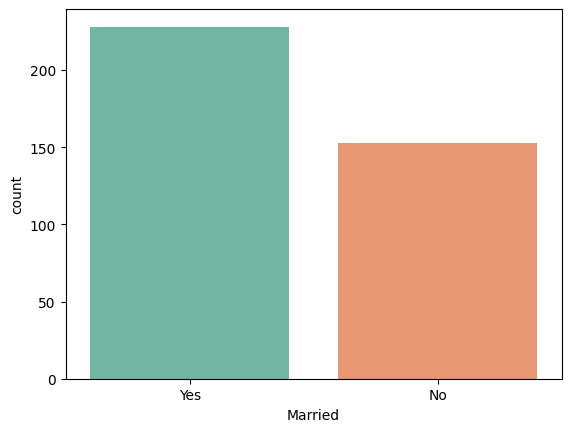

In [166]:
sns.countplot(data=df, x='Married',hue='Married', palette='Set2')

In [167]:
df['Gender'].value_counts()

Gender
Male      291
Female     85
Name: count, dtype: int64

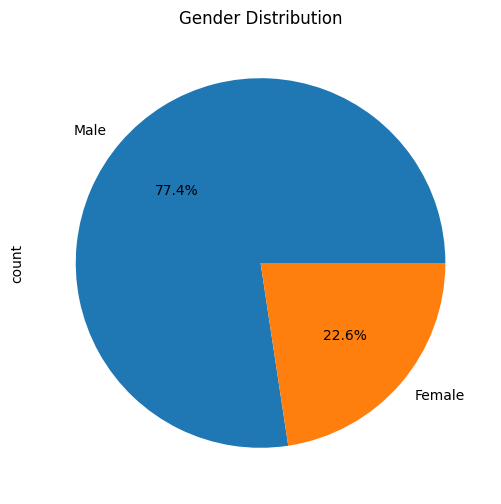

In [168]:
plt.figure(figsize=(6,6))
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

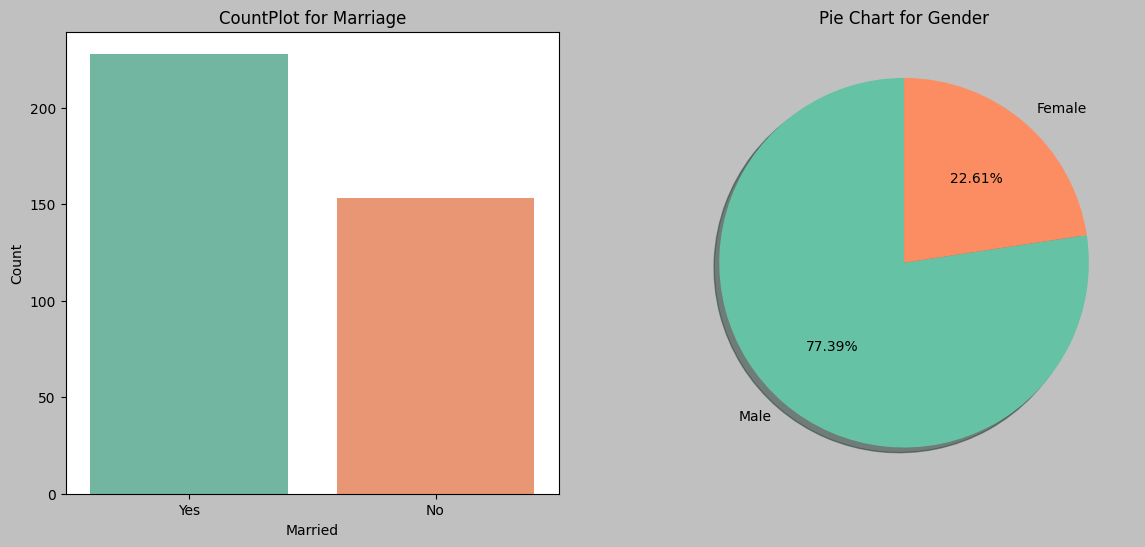

In [169]:
fig, axes = plt.subplots(1, 2, figsize=(14,6), facecolor = 'silver')
sns.countplot(data=df, x='Married',hue='Married', palette='Set2',ax = axes[0])

gender_count = df['Gender'].value_counts()
axes[1].pie(gender_count.values, labels = gender_count.index, autopct = '%1.2f%%', shadow = True, colors = sns.color_palette('Set2'), startangle=90)

# Setting title and label For Graph 0
axes[0].set_title('CountPlot for Marriage')
axes[0].set_xlabel('Married')
axes[0].set_ylabel('Count')


# Setting title and label For Graph 1
axes[1].set_title('Pie Chart for Gender')

plt.show()

In [170]:
def categorical_graph(df, col_name):
    fig, axes = plt.subplots(1, 2, figsize=(14,6), facecolor = 'silver')
    sns.countplot(data=df, x=col_name,hue='Married', palette='Set2',ax = axes[0])

    gender_count = df[col_name].value_counts()
    axes[1].pie(gender_count.values, labels = gender_count.index, autopct = '%1.2f%%', shadow = True, colors = sns.color_palette('Set2'), startangle=90)

    # Setting title and label For Graph 0
    axes[0].set_title('CountPlot for Marriage')
    axes[0].set_xlabel('Married')
    axes[0].set_ylabel('Count')


    # Setting title and label For Graph 1
    axes[1].set_title('Pie Chart for Gender')

    return fig

In [171]:
count_columns = [col for col in df.columns if df[col].dtype !=object]

In [172]:
count_columns

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [173]:
cont_columns = df.select_dtypes(include=['int64','float64']).columns.tolist()

In [174]:
cont_columns

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

<Axes: xlabel='LoanAmount', ylabel='Count'>

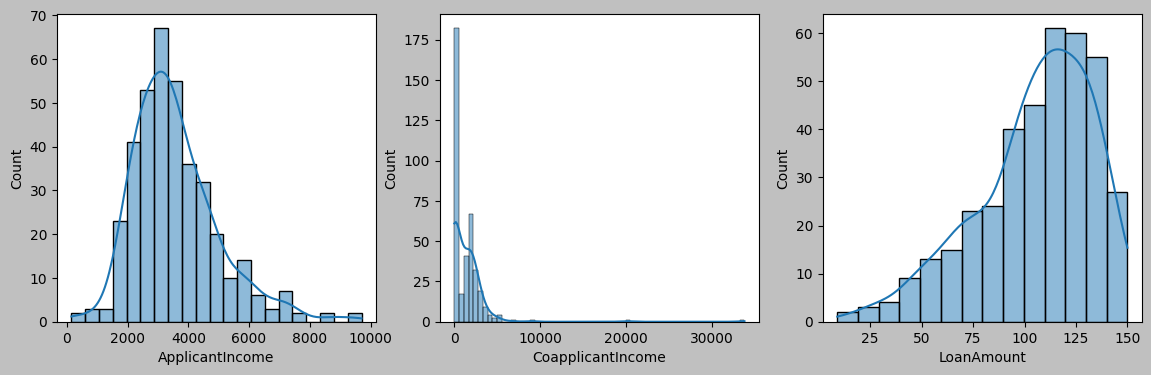

In [175]:
fig, axes = plt.subplots(1,3, figsize = (14,4), facecolor = 'silver')
sns.histplot(data = df,x = cont_columns[0],kde=True, ax = axes[0])
sns.histplot(data = df,x = cont_columns[1],kde=True, ax = axes[1])
sns.histplot(data = df,x = cont_columns[2],kde=True, ax = axes[2])

In [176]:
def get_histogram(df):
    cont_columns = df.select_dtypes(include=['int64','float64']).columns.tolist()
    fig, axes = plt.subplots(1,3, figsize = (14,4), facecolor = 'silver')
    sns.histplot(data = df,x = cont_columns[0],kde=True, ax = axes[0])
    sns.histplot(data = df,x = cont_columns[1],kde=True, ax = axes[1])
    sns.histplot(data = df,x = cont_columns[2],kde=True, ax = axes[2])
    return fig

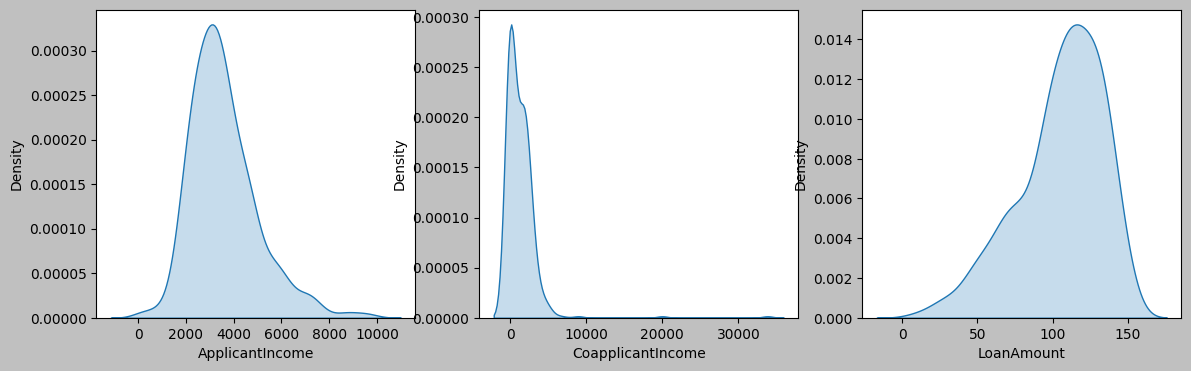

In [177]:
fig, axes = plt.subplots(1,3, figsize = (14,4), facecolor = 'silver')
col_one = cont_columns[0]
sns.kdeplot(data = df[col_one], fill = True, ax= axes[0])
col_two = cont_columns[1]
sns.kdeplot(data = df[col_two], fill = True, ax= axes[1])
col_three = cont_columns[2]
sns.kdeplot(data = df[col_three], fill = True, ax= axes[2])
plt.show()



In [178]:
def kde_plot(df):
    fig, axes = plt.subplots(1,3, figsize = (14,4), facecolor = 'silver')
    col_one = cont_columns[0]
    sns.kdeplot(data = df[col_one], fill = True, ax= axes[0])
    col_two = cont_columns[1]
    sns.kdeplot(data = df[col_two], fill = True, ax= axes[1])
    col_three = cont_columns[2]
    sns.kdeplot(data = df[col_three], fill = True, ax= axes[2])
    return fig

In [179]:
df.isnull().sum()

Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [180]:
df['Gender'].mode()[0]

'Male'

In [192]:
def fill_na(df, fill_type):
    for col in df.columns:
        if df[col].isnull().sum().tolist()>0:
            if df[col].dtype == object:
                mode = df[col].mode()[0]
                df[col] = df[col].fillna(mode)
            else:
                if fill_type == 'Mean':
                    mean_value = df[col].mean()
                    df[col] = df[col].fillna(mean_value)
                elif fill_type == 'Median':
                    median_value = df[col].median()
                    df[col] = df[col].fillna(median_value)
                else:
                    mode_value = df[col].mode()
                    df[col] = df[col].fillna(mode_value)
    return df

In [193]:
temp = fill_na(df, 'Mean')

In [194]:
temp.head(4)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [195]:
temp.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [196]:
temp['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [197]:
temp['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [202]:
def get_map(df, col_name):
    mapp = {}
    temp_list = df[col_name].unique().tolist()
    for index, val in enumerate(temp_list):
        mapp[val] = index
    return mapp

In [203]:
get_map(temp, 'Gender')

{'Male': 0, 'Female': 1}

In [205]:
def categorical_encoding(df, cat_cols):
    for col in cat_cols:
        temp_map = get_map(df, col)
        df[col] = df[col].map(temp_map)
    return df

In [206]:
cat_cols = [col for col in temp.columns if temp[col].dtype==object]

In [207]:
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [208]:
cont_cols = [col for col in temp.columns if temp[col].dtype!=object]

In [209]:
cont_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [210]:
from sklearn.preprocessing import MinMaxScaler


In [211]:
scaler = MinMaxScaler()

In [212]:
temp[cont_cols] = scaler.fit_transform(temp[cont_cols])

In [213]:
temp

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,0.464043,0.044567,0.843972,0.743590,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,0.298336,0.000000,0.404255,0.743590,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,0.254684,0.069687,0.787234,0.743590,1.0,Urban,Y
3,Male,No,0,Graduate,No,0.612373,0.000000,0.936170,0.743590,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,0.228515,0.044803,0.609929,0.743590,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
376,Male,Yes,3+,Graduate,No,0.581283,0.000000,0.843972,0.743590,1.0,Urban,Y
377,Male,Yes,0,Graduate,No,0.322621,0.057629,0.702128,0.743590,1.0,Rural,Y
378,Female,No,0,Graduate,No,0.287868,0.000000,0.439716,0.743590,1.0,Rural,Y
379,Male,Yes,3+,Graduate,No,0.414111,0.000000,0.219858,0.358974,1.0,Rural,Y
